Como primer paso, instalamos openCV y Numpy:

In [1]:
!pip install numpy==1.23
!pip install opencv-python==4.7.0.72
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 61.4 MB/s eta 0:00:00


### **Ejercicios 1 y 2:**

Cargamos una imagen de ejemplo utilizando openCV:

In [2]:
import cv2
import numpy as np

img_folder_path = './images/Landsat8 - TIFF/'
image = cv2.imread(f'{img_folder_path}LC08_224-078_2018-01-05_RGB.tif')

In [3]:
type(image)

NoneType

In [4]:
image.dtype

AttributeError: ignored

In [85]:
image.shape

(451, 1042, 3)

La mostramos:

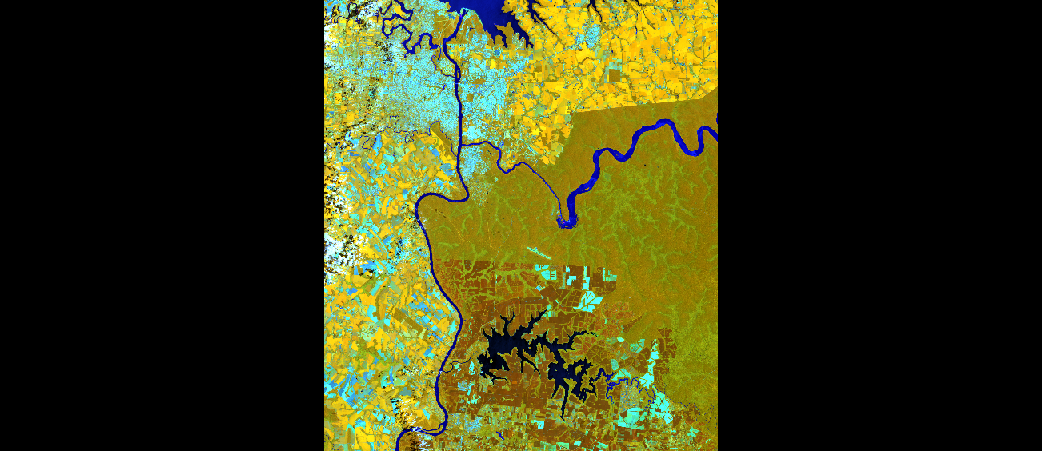

In [86]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Guardamos una copia en la misma carpeta:

In [87]:
cv2.imwrite(img_folder_path + "copy.png", image)

True

Obtenemos el valor del pixel de una imagen:

In [88]:
def get_pixel_value(img, x, y):
  return img[x, y]

In [89]:
print("Pixel (0,324): ", get_pixel_value(image, 0, 324))

Pixel (0,324):  [ 34 163 159]


In [90]:
print("Pixel (200,500): ", get_pixel_value(image, 200, 500))

Pixel (200,500):  [ 12 132 135]


Copiamos una parte de la imagen en otro archivo:

In [107]:
def crop_image(image, x1, y1, x2, y2, path=None):
  cropped = image[x1:x2, y1:y2, :].copy()
  if (path is not None) and (path != ''):
    cv2.imwrite(path, cropped)
  return cropped

In [108]:
np.where(image != 0)

(array([  0,   0,   0, ..., 450, 450, 450]),
 array([324, 324, 324, ..., 717, 717, 717]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [112]:
cropped = crop_image(image, 0, 324, 200, 524, img_folder_path + "cropped.tif")

In [113]:
np.where(cropped != 0)

(array([  0,   0,   0, ..., 199, 199, 199]),
 array([  0,   0,   0, ..., 199, 199, 199]),
 array([0, 1, 2, ..., 0, 1, 2]))

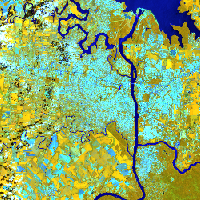

In [114]:
cv2_imshow(cropped)

In [148]:
import os

def load_landsat8_image(folder_path, file_prefix, img_extension = ".tif"):
  bands = np.array([cv2.imread(folder_path + f) for f in os.listdir(folder_path) if (f.startswith(file_prefix) and f.endswith(img_extension))])
  print(bands.shape)

In [149]:
load_landsat8_image(img_folder_path, "LC08_224-078_2018-01-05")

(8, 451, 1042, 3)


In [151]:
blue =cv2.imread(img_folder_path + "LC08_224-078_2018-01-05_blue.tif")

(array([  0,   0,   0, ..., 450, 450, 450]),
 array([   0,    0,    0, ..., 1041, 1041, 1041]),
 array([0, 1, 2, ..., 0, 1, 2]))

###**Ejercicio 3 y 4:**

In [121]:
def get_pixels_mean_report(image, x1, y1, x2, y2):
  cropped = image[x1:x2, y1:y2, :]
  print("Número de pixels:", cropped.size)
  print("Dimensiones:", cropped.shape)
  print("Cantidad de bandas:", cropped.shape[2])
  print("Promedio de intensidad por banda:", np.mean(image, axis=(0, 1)))
  print("Promedio general de color:", np.mean(image))

In [122]:
get_pixels_mean_report(image, 0, 324, 200, 524)

Número de pixels: 120000
Dimensiones: (200, 200, 3)
Cantidad de bandas: 3
Promedio de intensidad por banda: [20.92060297 57.32444429 55.52062382]
Promedio general de color: 44.58855702760483
